In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [6]:
df = pd.read_csv("all_perth_310121.csv")
df

,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,1 Acorn Place,South Lake,565000,4,2,2.0,600,160,2003.0,18300,Cockburn Central Station,1800,09-2018\r,6164,-32.115900,115.842450,LAKELAND SENIOR HIGH SCHOOL,0.828339,NaN
1,1 Addis Way,Wandi,365000,3,2,2.0,351,139,2013.0,26900,Kwinana Station,4900,02-2019\r,6167,-32.193470,115.859554,ATWELL COLLEGE,5.524324,129.0
2,1 Ainsley Court,Camillo,287000,3,1,1.0,719,86,1979.0,22600,Challis Station,1900,06-2015\r,6111,-32.120578,115.993579,KELMSCOTT SENIOR HIGH SCHOOL,1.649178,113.0
3,1 Albert Street,Bellevue,255000,2,1,2.0,651,59,1953.0,17900,Midland Station,3600,07-2018\r,6056,-31.900547,116.038009,SWAN VIEW SENIOR HIGH SCHOOL,1.571401,NaN
4,1 Aman Place,Lockridge,325000,4,1,2.0,466,131,1998.0,11200,Bassendean Station,2000,11-2016\r,6054,-31.885790,115.947780,KIARA COLLEGE,1.514922,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33651,9C Gold Street,South Fremantle,1040000,4,3,2.0,292,245,2013.0,16100,Fremantle Station,1500,03-2016\r,6162,-32.064580,115.751820,CHRISTIAN BROTHERS' COLLEGE,1.430350,49.0
33652,9C Pycombe Way,Westminster,410000,3,2,2.0,228,114,NaN,9600,Stirling Station,4600,02-2017\r,6061,-31.867055,115.841403,JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL,1.679644,35.0
33653,9D Pycombe Way,Westminster,427000,3,2,2.0,261,112,NaN,9600,Stirling Station,4600,02-2017\r,6061,-31.866890,115.841418,JOHN SEPTIMUS ROE ANGLICAN COMMUNITY SCHOOL,1.669159,35.0
33654,9D Shalford Way,Girrawheen,295000,3,1,2.0,457,85,1974.0,12600,Warwick Station,4400,10-2016\r,6064,-31.839680,115.842410,GIRRAWHEEN SENIOR HIGH SCHOOL,0.358494,NaN


# Data Pre-processing
## Includes data cleaning and formating

In [7]:
df.isnull().sum()

ADDRESS                 0
SUBURB                  0
PRICE                   0
BEDROOMS                0
BATHROOMS               0
GARAGE               2478
LAND_AREA               0
FLOOR_AREA              0
BUILD_YEAR           3155
CBD_DIST                0
NEAREST_STN             0
NEAREST_STN_DIST        0
DATE_SOLD               0
POSTCODE                0
LATITUDE                0
LONGITUDE               0
NEAREST_SCH             0
NEAREST_SCH_DIST        0
NEAREST_SCH_RANK    10952
dtype: int64

In [8]:
# WE will not fill the garage data because there are houses with 0 Garages
#Although we will fill the BUILD YEar with some values
# lets work on this first

df["BUILD_YEAR"].describe()


count    30501.000000
mean      1989.706436
std         20.964330
min       1868.000000
25%       1978.000000
50%       1995.000000
75%       2005.000000
max       2017.000000
Name: BUILD_YEAR, dtype: float64

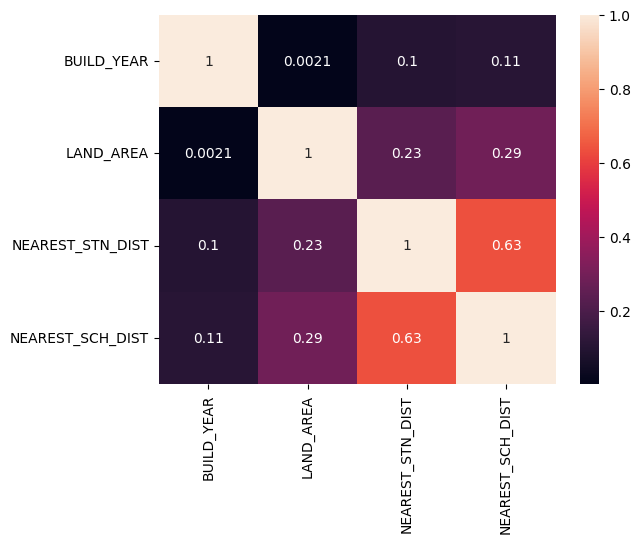

In [11]:
#Checking if other factors affect the building factor
correlation_matrix = df[['BUILD_YEAR', 'LAND_AREA', 'NEAREST_STN_DIST','NEAREST_SCH_DIST']].corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [12]:
#Let us fill the values using median

df["BUILD_YEAR"] = df["BUILD_YEAR"].fillna(df["BUILD_YEAR"].median())

In [13]:
df["BUILD_YEAR"].isnull().sum()

0

In [14]:
#We do not need nearest school rand so we drop that column
df = df.drop('NEAREST_SCH_RANK',axis=1)

In [17]:
df.shape

(33656, 18)

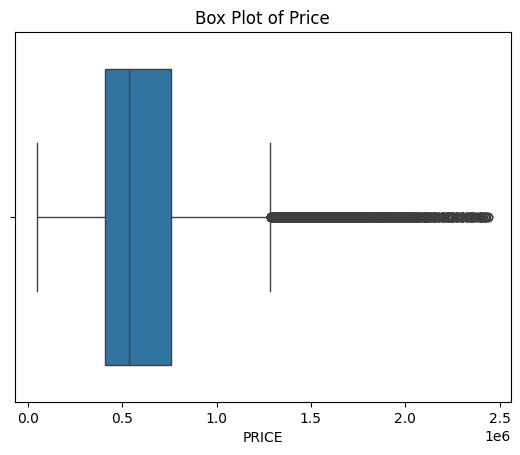

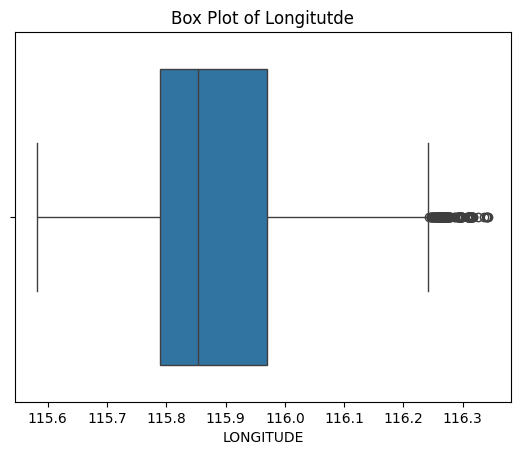

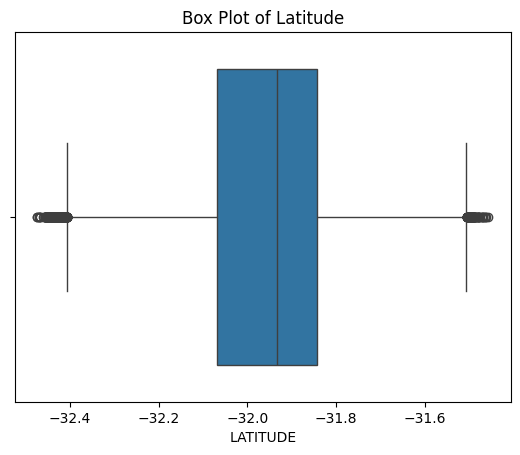

In [20]:
#Let us now look for any outliers if present in out dataset

# Box plot
sns.boxplot(x=df['PRICE'])
plt.title('Box Plot of Price')
plt.show()


sns.boxplot(x=df['LONGITUDE'])
plt.title('Box Plot of Longitutde')
plt.show()


sns.boxplot(x=df['LATITUDE'])
plt.title('Box Plot of Latitude')
plt.show()

# Exploratory Data Analysis

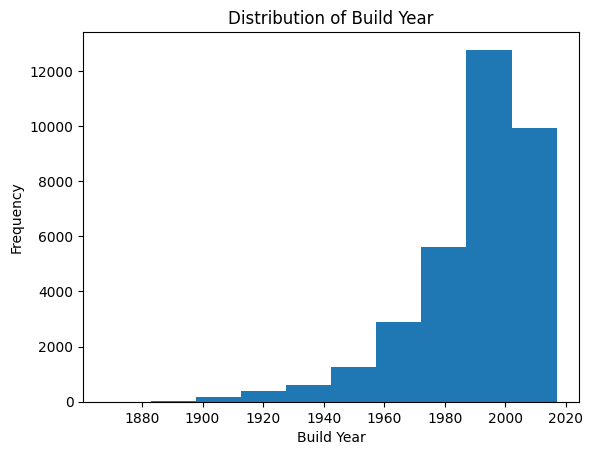

In [26]:
plt.hist(df['BUILD_YEAR'])
plt.xlabel('Build Year')
plt.ylabel('Frequency')
plt.title('Distribution of Build Year')
plt.show()

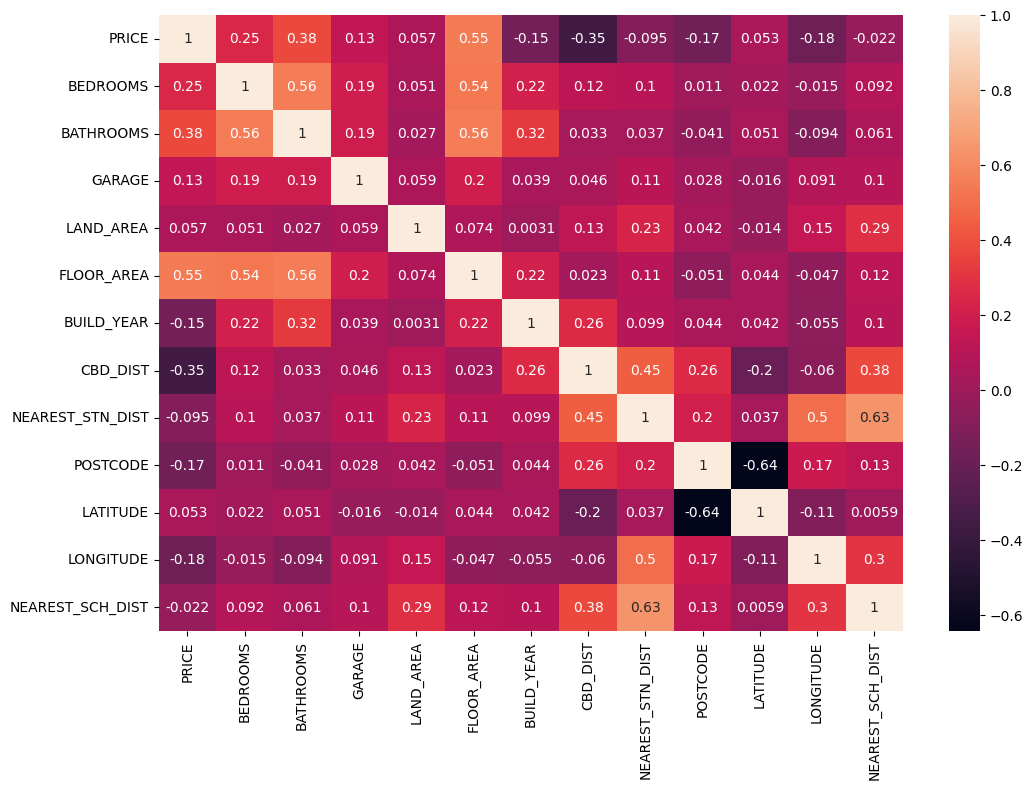

In [31]:
# Let us check which factor highly affect the target variable price

numerical_data = df.select_dtypes(include=np.number)

# Calculate correlation matrix
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix , annot=True)
plt.show()

Correlation Coefficient:  0.5484969130301006


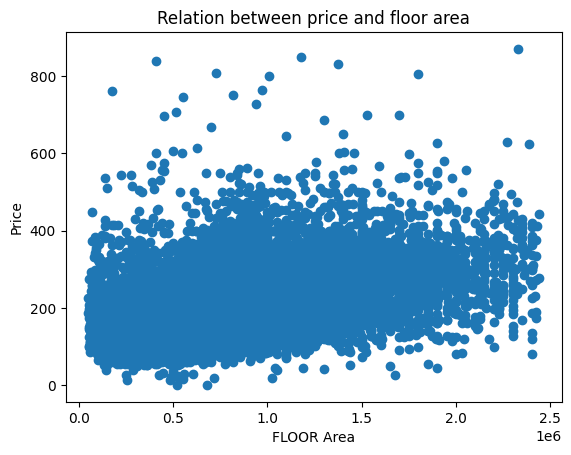

In [34]:
#Let us see how land areas and prices are build up 

#Let us first see the numerical value of correlation

correlation_coefficient = df["PRICE"].corr(df["FLOOR_AREA"])
print("Correlation Coefficient: " ,correlation_coefficient)

#Visulaization

plt.scatter(df["PRICE"],df["FLOOR_AREA"])
plt.title("Relation between price and floor area")
plt.xlabel("FLOOR Area")
plt.ylabel("Price")
plt.show()

Correlation Coefficient:  0.05685529394193872


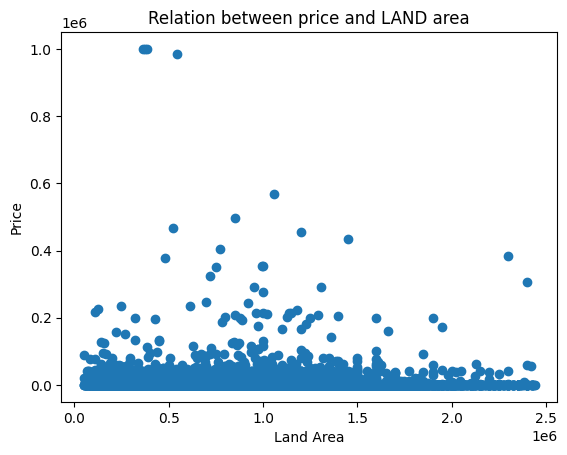

In [37]:
#Similar for LAND AREA

correlation_coefficient = df["PRICE"].corr(df["LAND_AREA"])
print("Correlation Coefficient: " ,correlation_coefficient)

#Visulaization

plt.scatter(df["PRICE"],df["LAND_AREA"])
plt.title("Relation between price and LAND area")
plt.xlabel("Land Area")
plt.ylabel("Price")
plt.show()

#the correlation is so weak so this wont really effect the price.


In [41]:
df["BUILD_YEAR"].value_counts()
#This shows 3934 houses were built that year in 1995


BUILD_YEAR
1995.0    3934
2000.0     965
2006.0     961
2004.0     907
2003.0     889
          ... 
1943.0       1
1895.0       1
1892.0       1
1889.0       1
1886.0       1
Name: count, Length: 124, dtype: int64

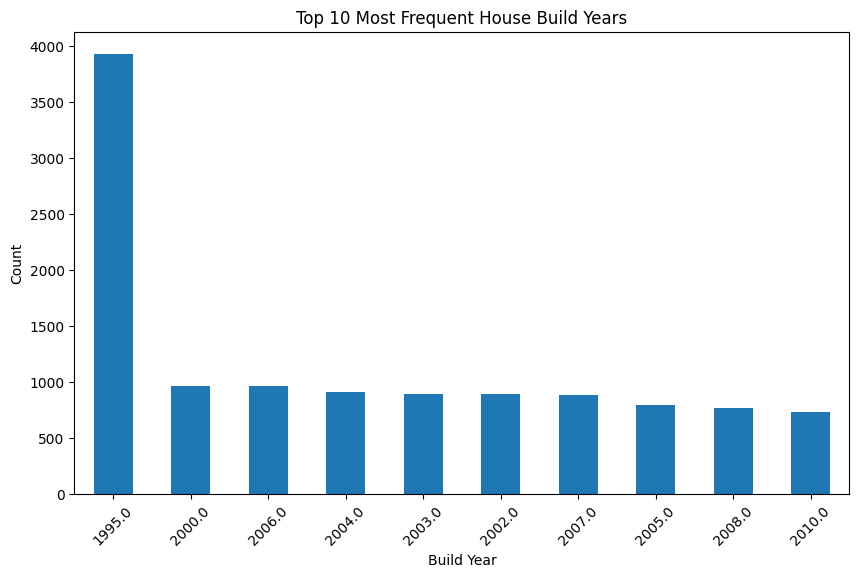

In [44]:
year_counts = df['BUILD_YEAR'].value_counts()

# Get the top 10 most frequent years
top_10_years = year_counts.head(10)

# Create a bar chart
plt.figure(figsize=(10, 6))
top_10_years.plot(kind='bar')
plt.title('Top 10 Most Frequent House Build Years')
plt.xlabel('Build Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

In [49]:
df["BEDROOMS"].describe()

count    33656.000000
mean         3.659110
std          0.752038
min          1.000000
25%          3.000000
50%          4.000000
75%          4.000000
max         10.000000
Name: BEDROOMS, dtype: float64

In [53]:
filtered_data = df[df['BEDROOMS'] == 10]

# Extract the 'LAND_AREA' values from the filtered rows
land_areas = filtered_data['LAND_AREA']

# Print the land areas
print("land_area of this house is: ", land_areas)

land_area of this house is:  5845     20250
10249    12914
Name: LAND_AREA, dtype: int64


# Prediction MODEL 
## Using Machine Learning to predict house price


For this purpose You have to Look into the ML_MODEL file... This is all from this file.